# Your first convolutional neural network

# imports

In [12]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

# data

In [13]:
NUM_CLASSES = 10

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [16]:
x_train[54, 12, 13, 1] 

0.36862746

In [17]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [18]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

# train

In [19]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [20]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 181s 115ms/step - loss: 1.5631 - accuracy: 0.4565 - val_loss: 1.3319 - val_accuracy: 0.5272
Epoch 2/10
1563/1563 [==============================] - 181s 116ms/step - loss: 1.1561 - accuracy: 0.5903 - val_loss: 1.0392 - val_accuracy: 0.6315
Epoch 3/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.0048 - accuracy: 0.6485 - val_loss: 1.0814 - val_accuracy: 0.6188
Epoch 4/10
1563/1563 [==============================] - 179s 115ms/step - loss: 0.9184 - accuracy: 0.6792 - val_loss: 1.0061 - val_accuracy: 0.6545
Epoch 5/10
1563/1563 [==============================] - 178s 114ms/step - loss: 0.8551 - accuracy: 0.7003 - val_loss: 0.8725 - val_accuracy: 0.6957
Epoch 6/10
1563/1563 [==============================] - 178s 114ms/step - loss: 0.8045 - accuracy: 0.7191 - val_loss: 0.8219 - val_accuracy: 0.7160
Epoch 7/10
1563/1563 [==============================] - 179s 114ms/step - loss: 0.7566 - accuracy: 0.7341 - val_

In [21]:
model.layers[6].get_weights()

[]

# analysis

In [22]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 10s 905ms/step - loss: 0.8727 - accuracy: 0.7092


[0.8726875185966492, 0.7092000246047974]

In [23]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 11s 33ms/step


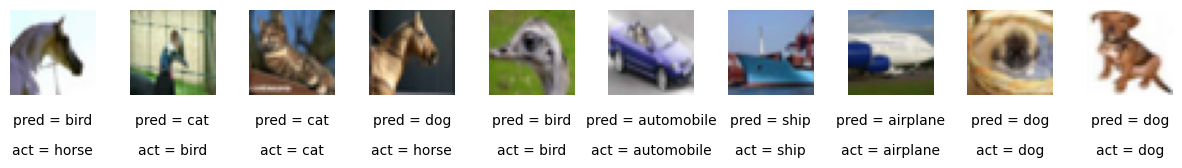

In [24]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
